<a href="https://colab.research.google.com/github/hamzarabi3/classification-with-imbalanced-data/blob/main/Attrition_prediction%2C_dealing_with_class_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this mini-project, We will be using different ML models to predict whether an employee will stay with the company or leave. 

For questions or suggestions reach out to me on [Linkedin](https://www.linkedin.com/in/hamza-rabi/) or send me an email at hamza-rabi@outlook.com.


# Setup


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
employee_df=pd.read_csv('/content/drive/MyDrive/Udemy8Projects/1. Human Resources Data/Human_Resources.csv')

In [4]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Data Analysis

In [6]:
employee_df['Attrition']=employee_df['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)
employee_df['OverTime']=employee_df['OverTime'].apply(lambda x : 1 if x=='Yes' else 0)
employee_df['Over18']=employee_df['Over18'].apply(lambda x : 1 if x=='Y' else 0)

**Check for N/A and null values**

In [7]:
employee_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

* Plot features histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1426e8ea50>,
      dtype=object)

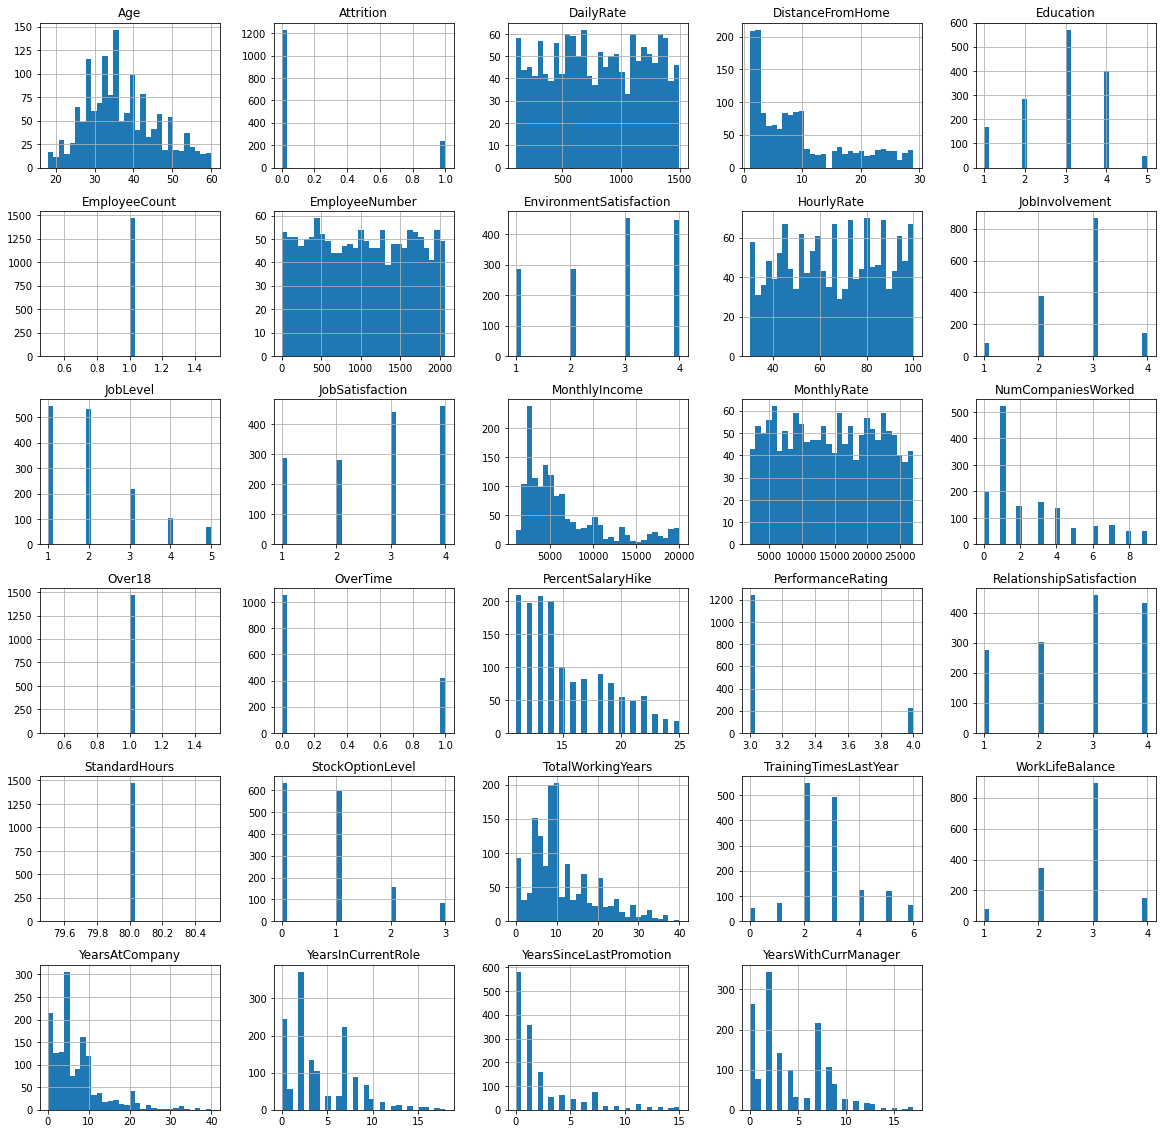

In [9]:
employee_df.hist(bins=30,figsize=(20,20))

**Observations :**
> * `StandardHours`, `EmployeeCount`, `Over18` all take one value.
> * `EmployeeNumber` is an ID.

> **We drop them**


In [10]:
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis='columns',inplace=True)

In [11]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [12]:
left_df = employee_df.query('Attrition == 1')
stayed_df = employee_df.query('Attrition == 0')

In [13]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**Correlation Analysis**

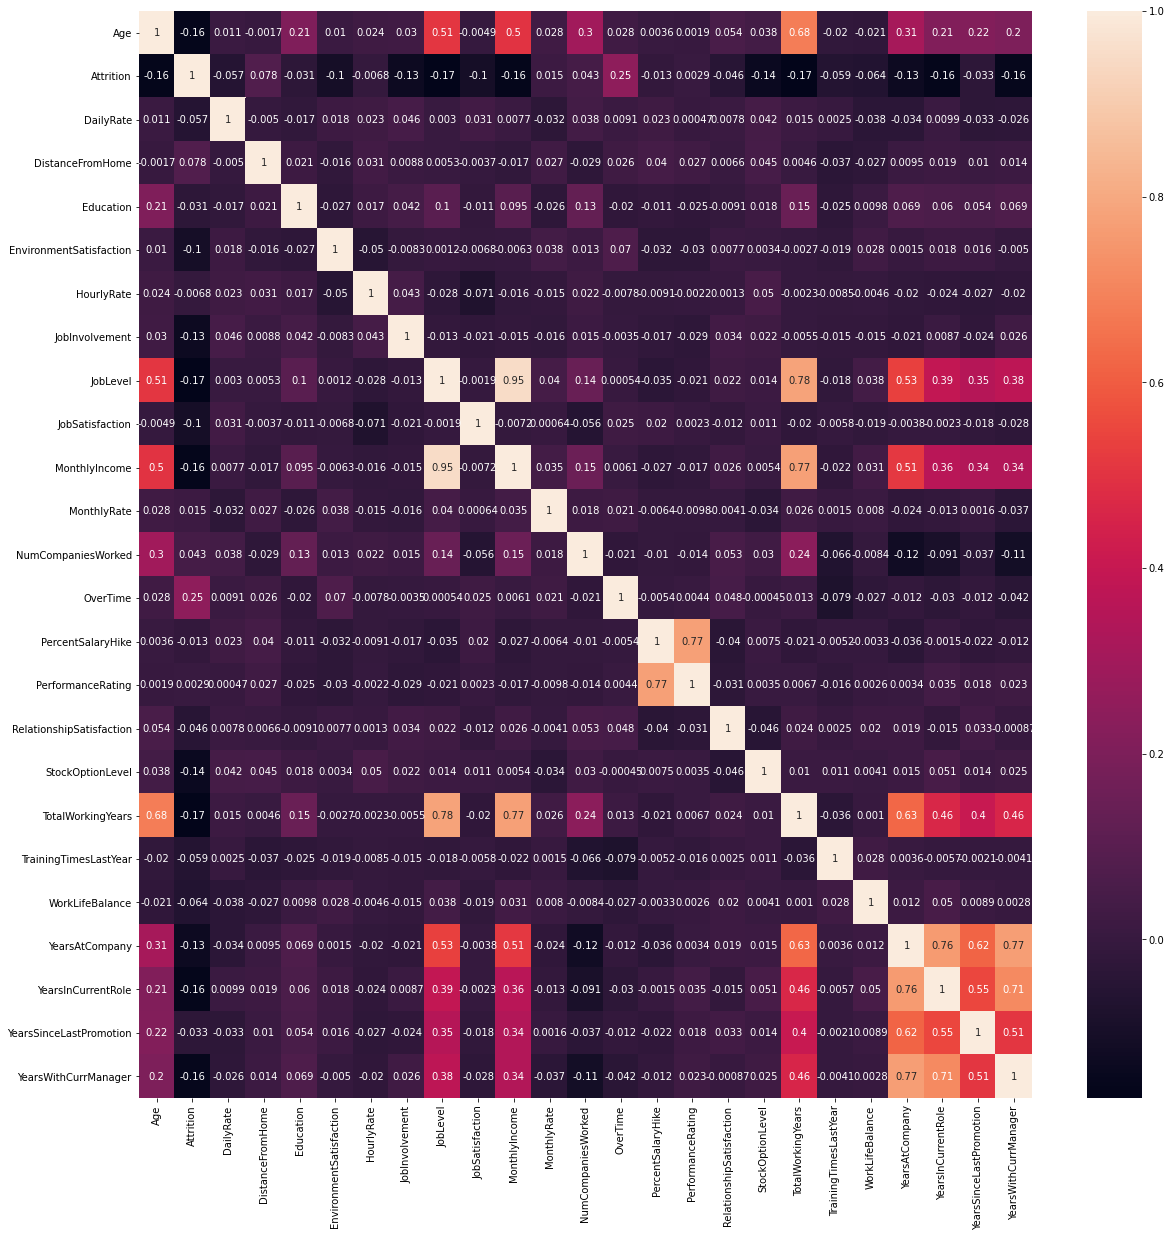

In [15]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(employee_df.corr(),annot=True)

**Observations :**
>* The most obvious correlation is the `MonthlyIncome`and `JobLevel`. 
>* `MonthlyIncome` and `ToalWorkingYears` are highly correlated as expected.   
>* `JobLevel` alos is correlated with the `TotalWorkingYears`
>* `PercentSalaryHike` and `PerformanceRating` are correlated as well,thanks to the performance based reward system put inplace. 


****

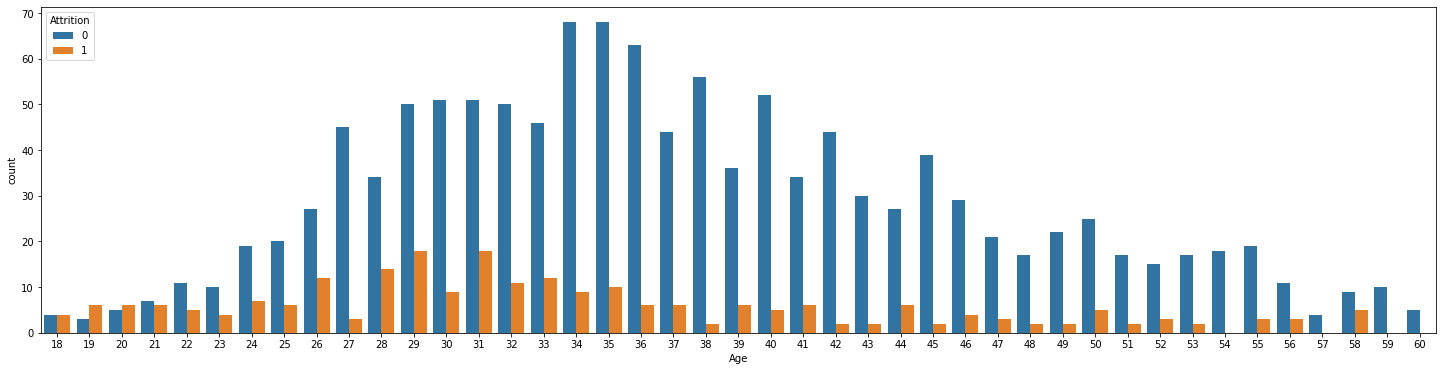

In [16]:
plt.figure(figsize=(25,6))
sns.countplot(x='Age',hue='Attrition',data=employee_df)

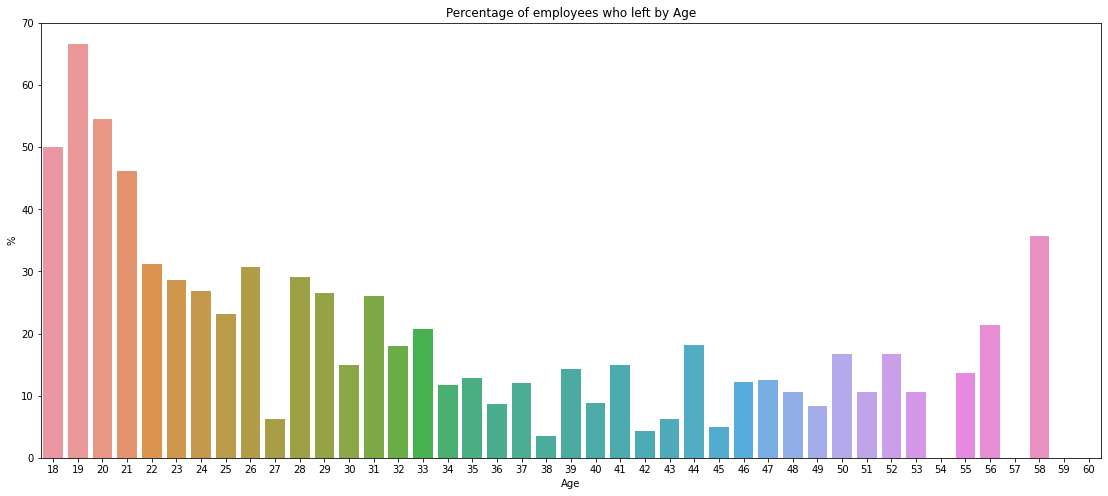

In [17]:
column='Age'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
plt.figure(figsize=(19,8))
sns.barplot(x=column,y='left_percent',data=df)
plt.title(f'Percentage of employees who left by {column}')
plt.ylabel('%');

**Observations :**
> * We can see that employees of age less than 22 are the most likely to leave. Why? : 1- They might be just interns or 2- younger people have less financial constraints (debt, family, mortgages...). 
> * Employees are not likely leave at age 27, 54, 42, 45 and 57. Why?

In [18]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

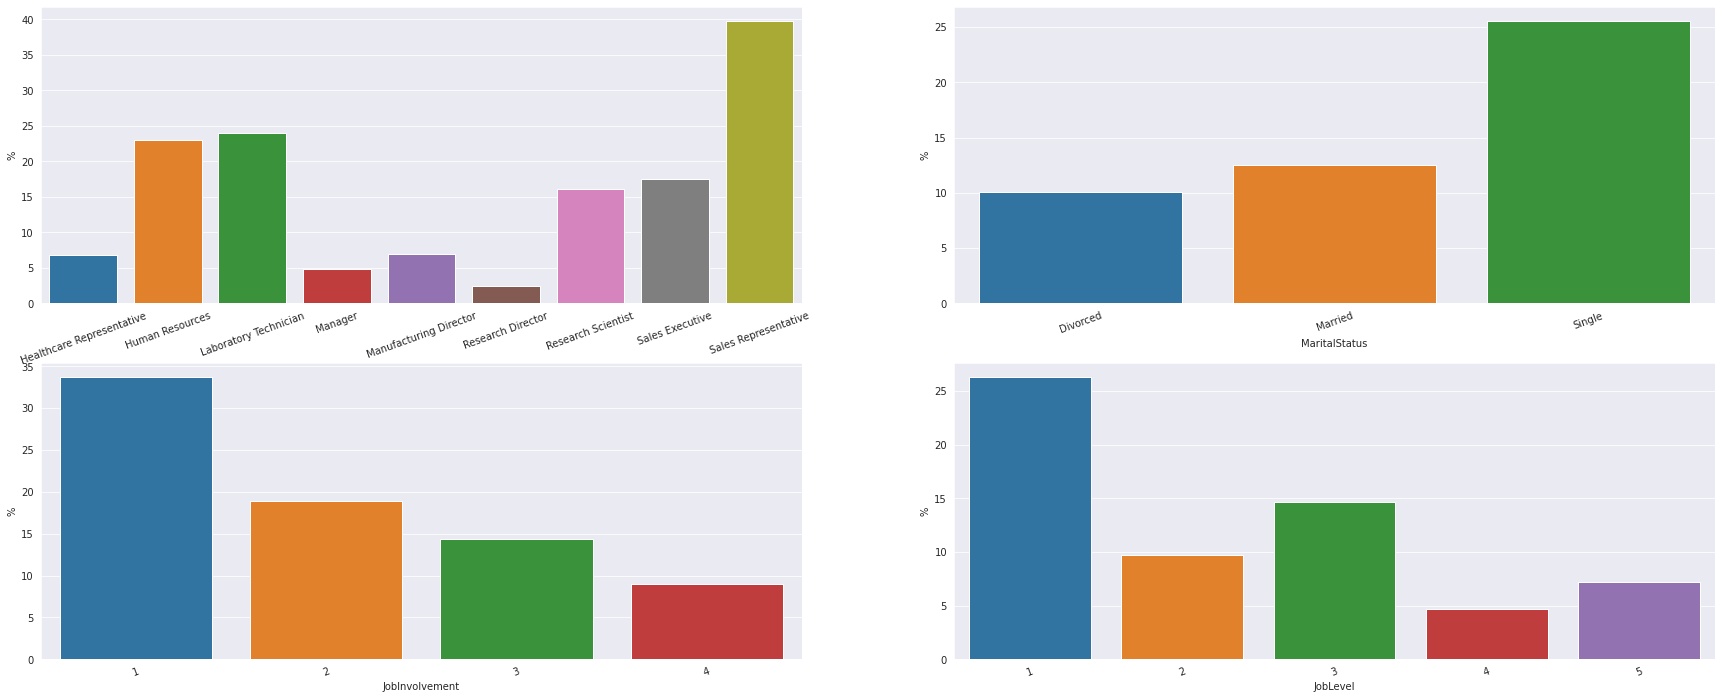

In [19]:
sns.set_style("darkgrid")

fig, axes= plt.subplots(nrows=2,ncols=2,figsize=(30,12))
column='JobRole'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[0,0]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);


column='MaritalStatus'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[0,1]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);

column='JobLevel'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[1,1]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);

column='JobInvolvement'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[1,0]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);

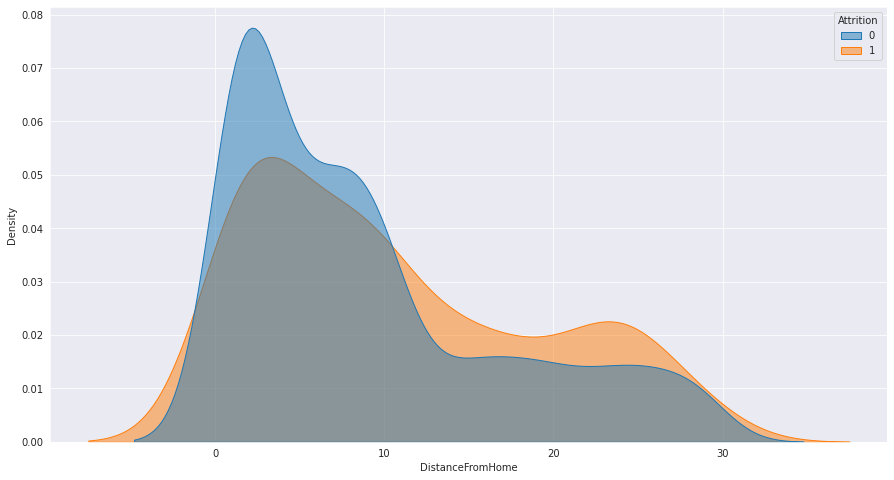

In [20]:
plt.figure(figsize=(15,8))
sns.kdeplot(
   data=employee_df, x="DistanceFromHome", hue="Attrition",
   fill=True, common_norm=False,
   alpha=.5, linewidth=1,
)

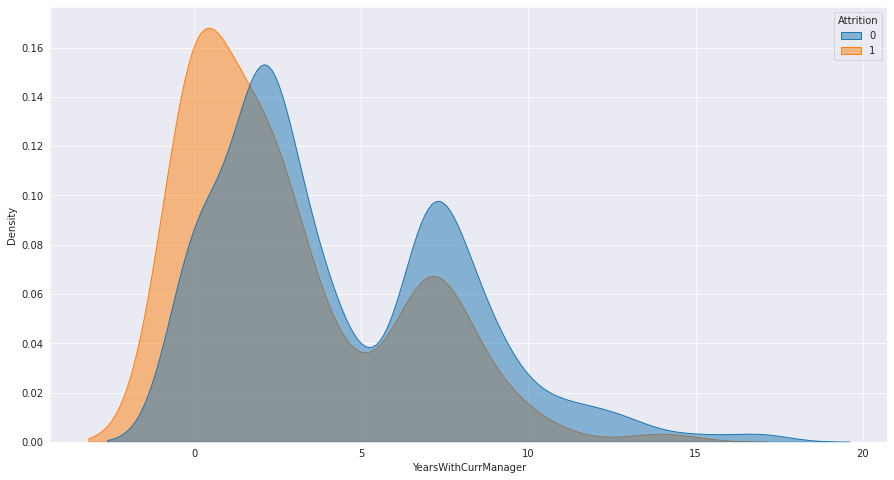

In [21]:
plt.figure(figsize=(15,8))
sns.kdeplot(
   data=employee_df, x="YearsWithCurrManager", hue="Attrition",
   fill=True, common_norm=False,
   alpha=.5, linewidth=1,
)

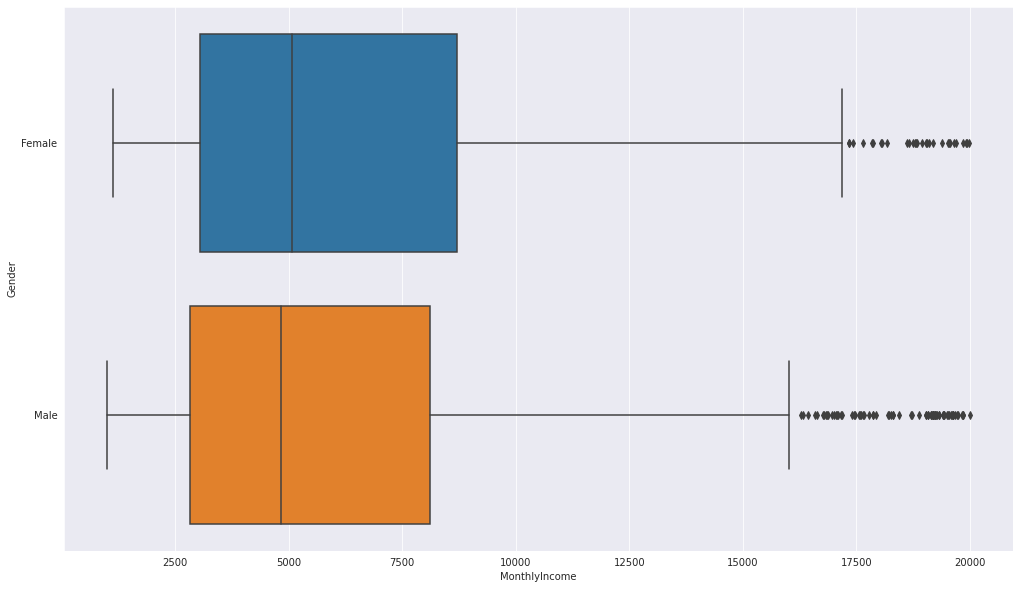

In [22]:
plt.figure(figsize=(17,10))
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)

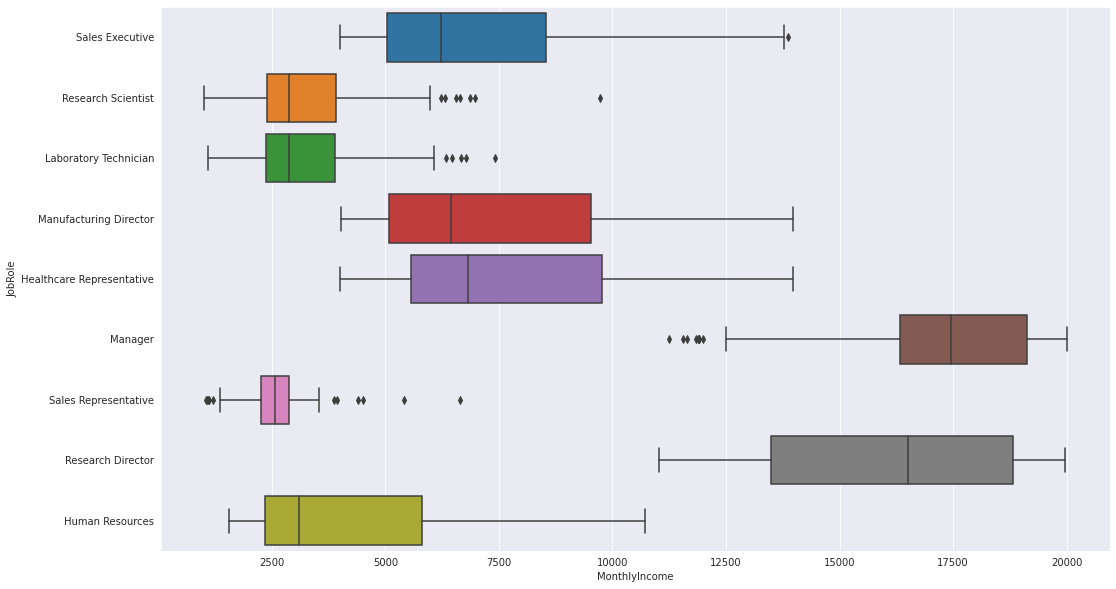

In [23]:
plt.figure(figsize=(17,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)

#Preprocessing

## Processing categorical features

In [24]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [25]:
categoricals=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']

In [26]:
X_cat= employee_df[categoricals]

In [27]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
onehotencoder=OneHotEncoder()
X_cat=onehotencoder.fit_transform(X_cat).toarray() 
X_cat= pd.DataFrame(X_cat)

In [30]:
X_numer=employee_df.drop(categoricals+['Attrition'],axis='columns')

In [31]:
X_all= pd.concat([ X_cat, X_numer],axis=1)

## Split and scale

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_all,employee_df['Attrition'],test_size= 0.25)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

In [99]:
from sklearn.preprocessing import MinMaxScaler 
mm=MinMaxScaler()

In [100]:
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
X_val = mm.transform(X_val)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_val= pd.DataFrame(X_val)

# Deep learning model

In [200]:
import tensorflow as tf 

In [201]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=30,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=100,verbose=0, batch_size=256
                ,validation_data=(X_val,y_val))

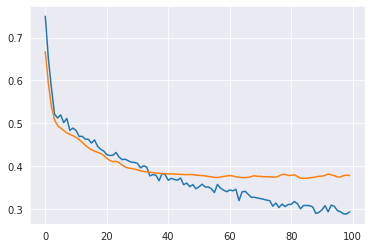

In [202]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [206]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c0=classification_report(y_test,y_pred)
print(c0)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       157
           1       0.72      0.48      0.58        27

    accuracy                           0.90       184
   macro avg       0.82      0.72      0.76       184
weighted avg       0.89      0.90      0.89       184



**Class imbalance problem**
## Solution 1 : Add class weights

In [207]:
neg= 929
pos= 173
total= 1102
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

In [208]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=30,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')

history=model.fit(X_train,
                  y_train,
                  epochs=50,
                  verbose=0,
                  batch_size=256,
                  validation_data=(X_val,y_val),
                  class_weight=class_weight
                  )

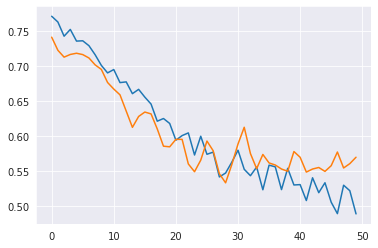

In [209]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [210]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       157
           1       0.48      0.81      0.60        27

    accuracy                           0.84       184
   macro avg       0.72      0.83      0.75       184
weighted avg       0.89      0.84      0.86       184



## Solution 2 : add bias to output neuron

In [211]:
initial_bias = np.log([pos/neg])
output_bias = tf.keras.initializers.Constant(initial_bias)

In [212]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=30,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',bias_initializer=output_bias))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')

history=model.fit(X_train,
                  y_train,
                  epochs=50,
                  verbose=0,
                  batch_size=256,
                  validation_data=(X_val,y_val)
                  )

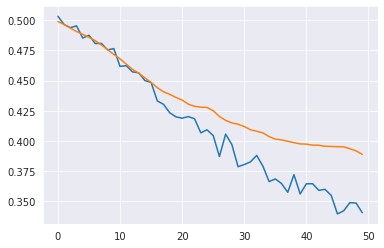

In [213]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [215]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c2=classification_report(y_test,y_pred)
print(c2)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       157
           1       0.85      0.41      0.55        27

    accuracy                           0.90       184
   macro avg       0.88      0.70      0.75       184
weighted avg       0.90      0.90      0.89       184



## Solution 3 : Oversample the less represented class

In [216]:
pos_features = X_train[y_train.values==1]
neg_features = X_train[y_train.values==0]

pos_labels = y_train[y_train.values==1]
neg_labels = y_train[y_train.values==0]

BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [217]:
BATCH_SIZE=64
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)

val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

In [218]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20,activation='relu',input_shape=(50,)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=30,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')


history=model.fit(resampled_ds,steps_per_epoch=resampled_steps_per_epoch,epochs=20,verbose=0,validation_data=val_ds)

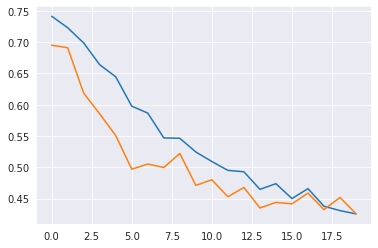

In [219]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [220]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c3=classification_report(y_test,y_pred)
print(c3)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       157
           1       0.47      0.70      0.57        27

    accuracy                           0.84       184
   macro avg       0.71      0.78      0.74       184
weighted avg       0.88      0.84      0.85       184



#Conlusion

In [223]:
print(f'Without taking into account class imbalance: \n {c0}')
print(f'After adding class weights: \n {c1}')
print(f'After adding initial bias to output unit: \n {c2}')
print(f'After using oversampling: \n {c3}')

Without taking into account class imbalance: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       157
           1       0.85      0.41      0.55        27

    accuracy                           0.90       184
   macro avg       0.88      0.70      0.75       184
weighted avg       0.90      0.90      0.89       184

After adding class weights: 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       157
           1       0.48      0.81      0.60        27

    accuracy                           0.84       184
   macro avg       0.72      0.83      0.75       184
weighted avg       0.89      0.84      0.86       184

After adding initial bias to output unit: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       157
           1       0.85      0.41      0.55        27

    accuracy                           0.90       184
   macr

---------------------------------------
* *In the approaches above, Adding initial bias to output, performs best when it comes to detecting positive labels (i.e employee left), which resulted in the highest f-1 score average (weighted)*
* *Although the bias initialiser trick did well compared to others, We can spot an overfit problem despite adding dropout and kernel regularizers* 
